# Module 3: Model Evaluation and Metrics

**Learning Objectives**
- Understand why evaluation is essential for classification models.
- Build and read a confusion matrix, and compute accuracy, precision, recall, F1, and false positive rate.
- Explore how decision thresholds change precision and recall.
- Understand ROC curves and AUC, and interpret their meaning.



## The Flow of Model Evaluation

When a classifier makes predictions, we need to measure how good those predictions are. The workflow is:

1. Train a classifier on labeled data.
2. Compare predictions to the true labels.
3. Build a confusion matrix to count outcomes.
4. Compute metrics derived from the confusion matrix.
5. Adjust thresholds to study trade-offs between errors.
6. Visualize ranking quality with ROC and compute AUC.
7. Interpret results to guide future improvements.


## Confusion Matrix and Terminology

A confusion matrix counts how many predictions fall into four categories.

|                | Predicted Positive | Predicted Negative |
|----------------|--------------------|--------------------|
| **Actual Positive** | True Positive (TP)   | False Negative (FN)  |
| **Actual Negative** | False Positive (FP)  | True Negative (TN)   |

- **True Positive (TP)**: predicted positive and actually positive.
- **False Positive (FP)**: predicted positive but actually negative.
- **True Negative (TN)**: predicted negative and actually negative.
- **False Negative (FN)**: predicted negative but actually positive.

### How to Read and Interpret a Confusion Matrix

**Structure:**
- The **rows** represent the actual (true) class labels.
- The **columns** represent the predicted class labels.
- The **diagonals** (top-left to bottom-right) represent correct predictions.
- The **off-diagonals** represent errors.

**Key Questions to Ask:**
1. **Are errors concentrated in one direction?** 
   - If most errors are FP, the model is **too optimistic** (predicts positive too often).
   - If most errors are FN, the model is **too conservative** (predicts negative too often).

2. **Which type of error is more prevalent?**
   - **High FP**: Many false alarms. Problem when false positives are costly (e.g., flagging healthy patients as sick).
   - **High FN**: Many missed cases. Problem when false negatives are costly (e.g., missing actual disease cases).

3. **Is the model balanced?**
   - If one class dominates (e.g., mostly TN and FN), the model may be biased toward the majority class.

**Imbalanced Class Hint:** In imbalanced datasets, a high overall accuracy can be misleading if the model simply predicts the majority class. Always check the confusion matrix directly.


## Metrics From The Confusion Matrix

Each metric answers a different question. In the formulas below, all terms come from the confusion matrix counts: $TP$, $FP$, $TN$, $FN$. The denominator of each fraction is the number of cases relevant to that question.

**Accuracy - How often are we correct overall.**
$$
\text{Accuracy} = \frac{TP + TN}{TP + FP + TN + FN}
$$
- Numerator: total correct predictions.
- Denominator: total number of predictions.

**Precision - When we predict positive, how often is that correct.**
$$
\text{Precision} = \frac{TP}{TP + FP}
$$
- Numerator: correct positives.
- Denominator: all predicted positives. A high value means few false alarms.
- Use Case: Useful when the cost of False Positives (FP) is high, such as in medical diagnoses where predicting a disease when it is not present can have serious consequences  


**Recall - Among actual positives, how many did we catch.**
$$
\text{Recall} = \frac{TP}{TP + FN}
$$
- Numerator: correct positives.
- Denominator: all actual positives. A high value means we miss few positives.
-Use Case: Important when missing a positive case (False Negative - FN) is more costly than false positives, such as in disease detection where catching all positive cases is critical 


**F1 Score - Single score balancing precision and recall.**
$$
F_1 = 2 \times   \frac{(\text{Precision} \times \text{Recall})}{(\text{Precision} + \text{Recall})}
$$
- Harmonic mean penalizes uneven precision and recall.
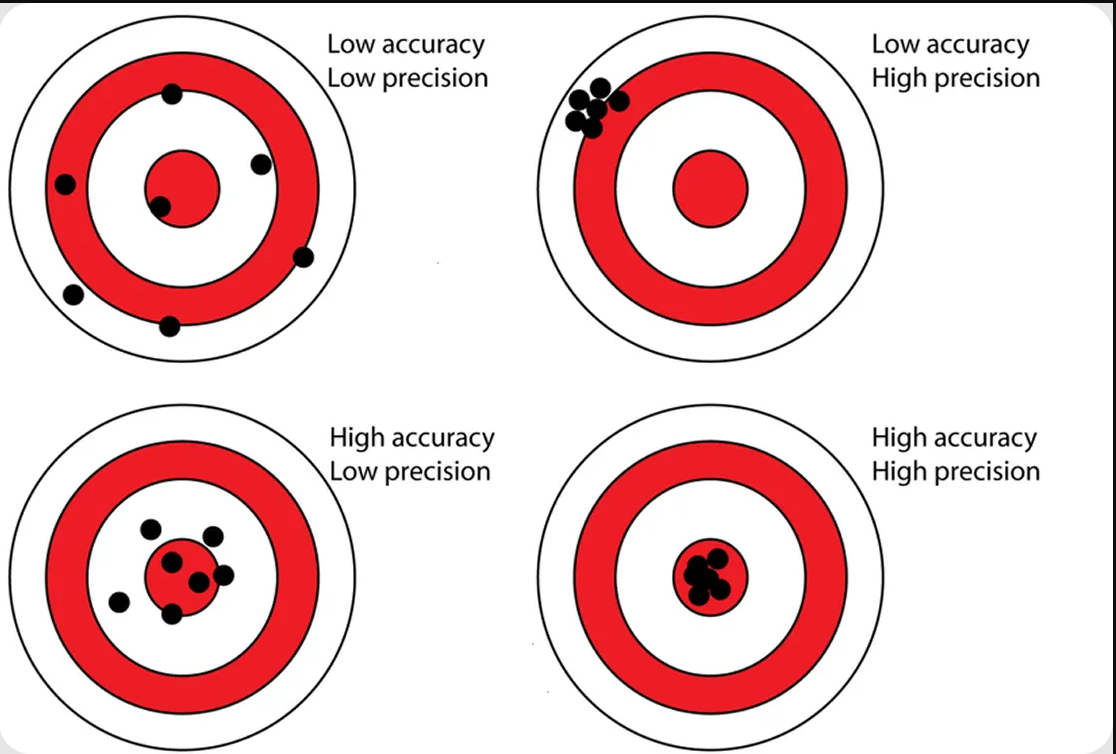

### Harmonic mean

The harmonic mean is useful for averaging rates/ratios. 
Formula (n positive values):
$$
H = \frac{n}{\sum_{i=1}^{n} \frac{1}{x_i}}
$$

Terms:
- n: number of values
- x_i: the i-th value (i = 1,...,n)
- Σ: sum over i

Two-value case (connects to F1):
$$
\mathrm{HM}(x, y) = \frac{2xy}{x + y}
$$

**From harmonic mean to F1 (kid-friendly):**
- The F1 score is just the harmonic mean of **Precision** and **Recall**.
- So we set $x = \text{Precision}$ and $y = \text{Recall}$.
- Plugging into the two-value formula gives:
$$
F_1 = \mathrm{HM}(\text{Precision}, \text{Recall}) = \frac{2\,\text{Precision}\,\text{Recall}}{\text{Precision} + \text{Recall}}
$$

**How to interpret F1 (simple):**
- The score ranges from 0 to 1.
- **Closer to 1 (desirable):** the model is doing well on both precision and recall, so it makes few false alarms **and** misses few positives.
- **Closer to 0 (non-desirable):** the model is doing poorly on at least one of them, so it either misses many positives or raises many false alarms (or both).
- Use F1 when you care about **both** missed positives (FN) and false alarms (FP), especially with imbalanced classes.




## Manual Example - Student Dataset

We reuse a small set of predictions so the math is easy to follow.

| Student | Hours Studied | Attendance (%) | Actual | Predicted |
|----------|---------------|----------------|--------|-----------|
| A | 2 | 40 | Fail | Fail |
| B | 3 | 60 | Fail | Pass |
| C | 4 | 70 | Fail | Pass |
| D | 6 | 75 | Pass | Pass |
| E | 7 | 80 | Pass | Pass |
| F | 8 | 90 | Pass | Pass |
| G | 9 | 95 | Pass | Pass |
| H | 5 | 50 | Fail | Fail |
| I | 3 | 55 | Fail | Fail |
| J | 4 | 60 | Fail | Fail |

From this table:
- $TP = 4$
- $FP = 2$
- $TN = 4$
- $FN = 0$

Now compute each metric by substituting the numbers.

**Accuracy**
$$
\text{Accuracy} = \frac{TP + TN}{TP + FP + TN + FN} = \frac{4 + 4}{4 + 2 + 4 + 0} = \frac{8}{10} = 0.8
$$

**Precision**
$$
\text{Precision} = \frac{TP}{TP + FP} = \frac{4}{4 + 2} = \frac{4}{6} = 0.667
$$

**Recall**
$$
\text{Recall} = \frac{TP}{TP + FN} = \frac{4}{4 + 0} = 1.0
$$

**F1 Score**
$$
F_1 = 2 \times \frac{(0.667 \times 1.0)}{(0.667 + 1.0)} = 0.8
$$

 


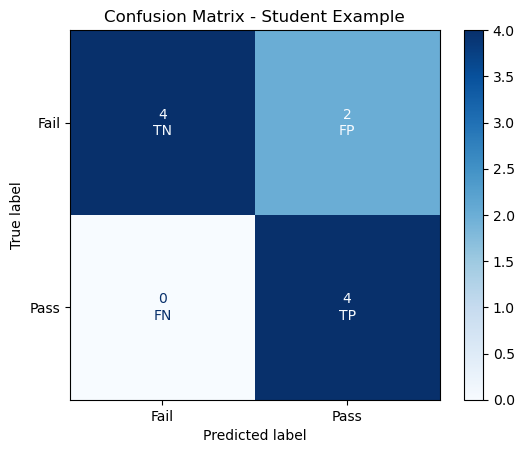

Accuracy: 0.8
Precision: 0.667
Recall: 1.0
F1 Score: 0.8
False Positive Rate: 0.333


In [2]:

# Compute confusion matrix and metrics for the manual stud  ent example
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

df = pd.DataFrame({
    "Actual":    ["Fail","Fail","Fail","Pass","Pass","Pass","Pass","Fail","Fail","Fail"],
    "Predicted": ["Fail","Pass","Pass","Pass","Pass","Pass","Pass","Fail","Fail","Fail"]
})

# Encode as 0 and 1
y_true = df["Actual"].map({"Fail":0,"Pass":1}).values
y_pred = df["Predicted"].map({"Fail":0,"Pass":1}).values

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Fail","Pass"])
disp.plot(cmap="Blues")
# Add TP/TN/FP/FN labels under counts
ax = disp.ax_
labels_2x2 = [["TN","FP"], ["FN","TP"]]
for i, text in enumerate(ax.texts):
    r, c = divmod(i, 2)
    text.set_text(f"{text.get_text()}\n{labels_2x2[r][c]}")
    text.set_va("center")
plt.title("Confusion Matrix - Student Example")
plt.show()

# Metrics
acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred)
rec = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
fpr = cm[0,1] / (cm[0,1] + cm[0,0])

print("Accuracy:", round(acc, 3))
print("Precision:", round(prec, 3))
print("Recall:", round(rec, 3))
print("F1 Score:", round(f1, 3))
print("False Positive Rate:", round(fpr, 3))





## Precision and Recall Trade-Off Through Thresholds

If a classifier produces a probability score, we can vary the threshold to decide when to predict positive. Changing the threshold creates a **trade-off** between precision and recall.

### Why These Changes Happen (Simple Explanation)

**What is a threshold?** It's a cutoff score. The model says "if my confidence is above this number, predict positive; otherwise predict negative."

**Higher Threshold (e.g., 0.9 instead of 0.5):**
- **Precision increases** ✓
  - *Why?* We only predict positive for cases we're **very confident** about (high scores). We make fewer positive predictions overall, but most of them are correct. Fewer false alarms = higher precision.
  - *Analogy:* It's like a doctor who only diagnoses a disease when they're 99% sure. They make few wrong diagnoses, so precision is high.

- **Recall decreases** ✗
  - *Why?* By being so strict, we **miss many actual positives** that have good scores but fall just below our high threshold. We catch fewer true cases overall. More false negatives = lower recall.
  - *Analogy:* The cautious doctor misses many patients who actually have the disease because they want to be absolutely sure before diagnosing.

**Lower Threshold (e.g., 0.3 instead of 0.5):**
- **Recall increases** ✓
  - *Why?* We predict positive for **many more cases** (being less strict). We catch most of the actual positives, even the ones with borderline scores. More true positives = higher recall.
  - *Analogy:* It's like a screening test at a hospital that flags anyone who might be sick. It catches almost everyone with the disease, but also flags many healthy people.

- **Precision decreases** ✗
  - *Why?* By being so lenient, we **make many false positive mistakes**. We predict positive for cases that are actually negative. More false positives = lower precision.
  - *Analogy:* The liberal screening test is good at catching all sick people but causes alarm among many healthy people too.

**The F1 Score Trade-Off:**
- F1 balances precision and recall, so it peaks somewhere in the middle—where precision and recall are both reasonably good.

Below we simulate this effect on the student example with a small vector of probabilities.


In [3]:

import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

# Simulated predicted probabilities for the 10 students, aligned with y_true above
# Larger numbers indicate higher confidence for Pass
probs = np.array([0.20, 0.55, 0.60, 0.85, 0.90, 0.88, 0.92, 0.25, 0.35, 0.40])

thresholds = [0.3, 0.5, 0.7, 0.9]
rows = []
for t in thresholds:
    preds = (probs >= t).astype(int)
    rows.append({
        "Threshold": t,
        "Precision": precision_score(y_true, preds),
        "Recall": recall_score(y_true, preds),
        "F1": f1_score(y_true, preds)
    })

thr_table = pd.DataFrame(rows)
print(thr_table.to_string(index=False))


 Threshold  Precision  Recall       F1
       0.3   0.500000     1.0 0.666667
       0.5   0.666667     1.0 0.800000
       0.7   1.000000     1.0 1.000000
       0.9   1.000000     0.5 0.666667



Interpretation: as the threshold increases, precision typically goes up because we only call high confidence cases positive, but recall falls because we miss more actual positives. The F1 score shows where the balance is best.



## ROC Curve and AUC

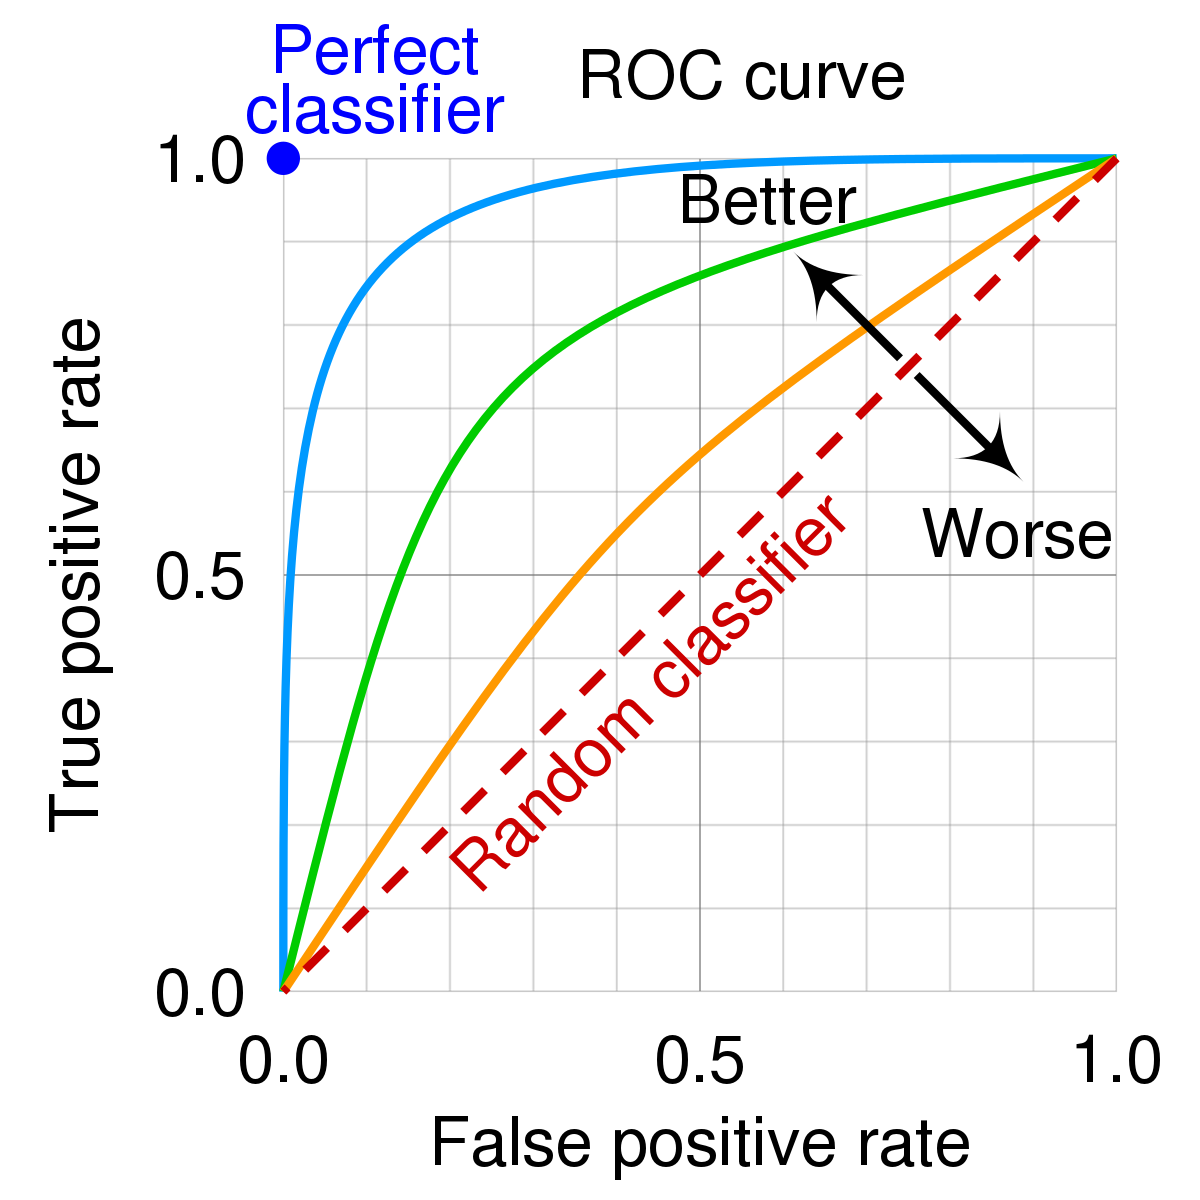

### What Is ROC?

**ROC** stands for **Receiver Operating Characteristic**. 

**Why is it called that?** The name comes from World War II radar technology. Engineers needed to distinguish between real aircraft signals (true positives) and false alarms from noise (false positives). They analyzed how well radar "receivers" could "operate" across different sensitivity settings—hence "Receiver Operating Characteristic."

Today, we use ROC curves in machine learning to evaluate how well a classifier distinguishes between two classes (positive vs. negative) across different decision thresholds.

### Understanding the ROC Curve

The ROC curve plots **True Positive Rate (TPR)** on the y-axis against **False Positive Rate (FPR)** on the x-axis for all possible decision thresholds. It is one of the most important tools for evaluating classifier performance.

**Definitions:**
$$
\text{TPR} = \frac{TP}{TP + FN} = \text{Recall (How many actual positives did we catch?)}
$$
$$
\text{FPR} = \frac{FP}{FP + TN} = \text{(How many negatives did we incorrectly call positive?)}
$$

### How to Read a ROC Curve

**The Dashed Diagonal Line (The Baseline for Random Guessing):**
- The line from point (0, 0) to point (1, 1) represents **completely random guessing** (like flipping a coin).
- This line has an AUC of 0.5.

**Where to Prefer: ABOVE or BELOW the Dashed Line?**
- **Your classifier's curve should be ABOVE the dashed line.**
- If your curve is **above the diagonal**, your model is **better than random**.
- If your curve **follows the diagonal closely**, your model is **no better than guessing**.
- If your curve is **below the diagonal** (rare), there may be an error or your labels are inverted.

**Reading the Curve Itself:**
- The curve bulges upward and to the left toward the point (0, 1).
- Point (0, 1) = **perfect classifier**: catches all positives with zero false alarms.
- A curve that **bulges sharply into the upper-left corner** indicates a **strong classifier**.
- A curve that **stays close to the diagonal** indicates a **weak classifier**.

**What the Axes Tell You:**
- Move **left to right** (increasing FPR): We lower the decision threshold, catching more positives BUT producing more false alarms.
- Move **bottom to top** (increasing TPR): We're catching more of the actual positives.
- **The trade-off:** You can't have a high TPR and low FPR simultaneously for a realistic classifier.

### What Is AUC and Why Does It Matter?

**AUC = Area Under the Curve**

The AUC is the **total area between your ROC curve and the x-axis**. It is a single number that summarizes classifier performance, ranging from **0 to 1**.

**Is Higher Better or Lower for AUC?**
- **HIGHER is BETTER for AUC.**
- AUC = 1.0: Perfect classifier.
- AUC = 0.5: Random guessing (no better than flipping a coin).
- AUC < 0.5: Worse than random (likely a mistake in your code or inverted labels).

**AUC Interpretation Guidelines:**

| AUC Value | Performance | Interpretation |
|-----------|-------------|-----------------|
| 0.90–1.00 | **Excellent** | Model separates classes very well. Strong predictions. |
| 0.80–0.89 | **Good** | Model separates classes reasonably well. Acceptable performance. |
| 0.70–0.79 | **Fair** | Model has some predictive power but with noticeable overlap. |
| 0.60–0.69 | **Poor** | Model barely outperforms random guessing. Weak separation. |
| 0.50 | **Failure** | Model is equivalent to random guessing. No discrimination ability. |
| < 0.50 | **Error** | Model performs worse than random. Check for inverted labels or bugs. |

**What AUC Really Means (Probability Interpretation):**
An AUC of 0.85 means: *"If you randomly pick one positive example and one negative example, there's an 85% chance the model assigns a higher score to the positive example."*

In other words, AUC measures how well the model **ranks** classes, independent of the decision threshold.

### Why AUC Is Useful

1. **Threshold-Independent**: Unlike accuracy, AUC evaluates the model across all thresholds, not just one.
2. **Handles Imbalanced Data**: AUC is less deceived by imbalanced classes compared to accuracy. If most data is negative, a model that always predicts negative gets high accuracy but low AUC.
3. **Single Summary**: Easy to compare different models with one number.
4. **Focuses on Ranking**: You often care about which cases are **most likely positive**, not just the binary prediction.

### Interpreting the ROC Curve in Practice

When you see the ROC curve in the plots above:
- The blue curve shows your model's performance.
- The gray dashed line is the baseline (random).
- The area between the blue curve and the x-axis is shaded (in some visualizations)—that's your AUC.
- The **larger the area**, the **better your model**.

**Example: What Does the Titanic-Style Example Show?**
- If AUC ≈ 0.87, the model has **good** discrimination ability between survivors and non-survivors.
- The curve bulges noticeably above the diagonal, indicating the logistic regression learned meaningful patterns.
- You could use this model with reasonable confidence to rank passengers by survival probability.




## Titanic-style Dataset Example

To mimic the Titanic setting without external data files, we will synthesize a small dataset with similar structure. We will generate features `age`, `fare`, and `sex_num` and create a survival label that depends on these variables with noise. This is for illustration, not for historical accuracy.


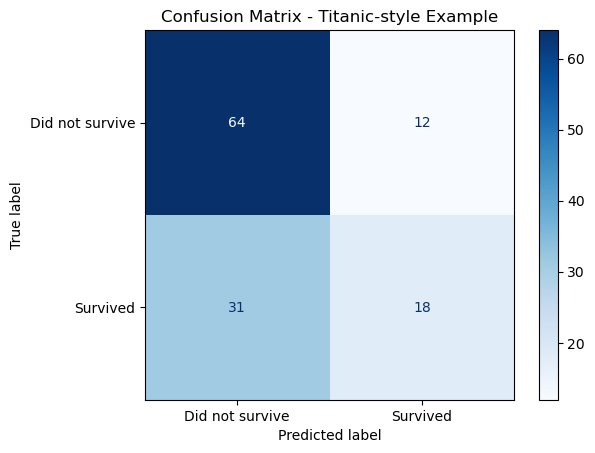

NameError: name 'roc_auc_score' is not defined

In [4]:

# Create a synthetic Titanic-style dataset
rng = np.random.default_rng(42)
n = 500

age = rng.normal(30, 14, size=n).clip(1, 80)
fare = rng.gamma(shape=2.0, scale=20.0, size=n).clip(5, 250)
sex_num = rng.integers(0, 2, size=n)  # 0 = male, 1 = female

# Survival probability model: females and higher fare slightly more likely to survive,
# younger age slightly more likely to survive. Add logistic noise.
logit = -2.0 + 0.04*(50 - age) + 0.003*(fare) + 1.0*sex_num
p_survive = 1 / (1 + np.exp(-logit))
survived = (rng.uniform(size=n) < p_survive).astype(int)

titanic_df = pd.DataFrame({
    "age": age,
    "fare": fare,
    "sex_num": sex_num,
    "survived": survived
})

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = titanic_df[["age","fare","sex_num"]]
y = titanic_df["survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, stratify=y)

lr = LogisticRegression(max_iter=2000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_prob = lr.predict_proba(X_test)[:,1]

cm_t = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_t, display_labels=["Did not survive","Survived"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Titanic-style Example")
plt.show()

acc_t = accuracy_score(y_test, y_pred)
prec_t = precision_score(y_test, y_pred)
rec_t = recall_score(y_test, y_pred)
f1_t = f1_score(y_test, y_pred)
auc_t = roc_auc_score(y_test, y_prob)

print("Titanic-style Metrics")
print("---------------------")
print(f"Accuracy: {acc_t:.3f}")
print(f"Precision: {prec_t:.3f}")
print(f"Recall: {rec_t:.3f}")
print(f"F1 Score: {f1_t:.3f}")
print(f"AUC: {auc_t:.3f}")

# ROC
fpr_t, tpr_t, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(5,4))
plt.plot(fpr_t, tpr_t, label=f"AUC = {auc_t:.2f}")
plt.plot([0,1],[0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Titanic-style Example")
plt.legend()
plt.show()



Interpretation: the logistic regression should assign higher survival probability to females and passengers with higher fares, and lower survival probability to older passengers. The confusion matrix and metrics quantify classification performance at the default threshold. The ROC curve and AUC quantify how well the model ranks survivors ahead of non-survivors across all thresholds.



## Cross-validation For Metric Stability

Single train test splits can be lucky or unlucky. Cross-validation averages across multiple splits to estimate stability.


In [ ]:

from sklearn.model_selection import cross_val_score

scores = cross_val_score(LogisticRegression(max_iter=2000), X, y, cv=5, scoring="accuracy")
print("Cross-validation accuracy scores:", np.round(scores, 3))
print("Mean accuracy:", np.round(scores.mean(), 3))


Cross-validation accuracy scores: [0.71 0.6  0.62 0.69 0.63]
Mean accuracy: 0.65



## Wrap Up

- The confusion matrix is the foundation for evaluation.
- Accuracy, precision, recall, F1, and false positive rate tell complementary stories.
- Thresholds control the balance between precision and recall.
- ROC and AUC evaluate ranking quality across all thresholds.
 